# **WGAN: Wasserstein GAN**

### **Wasserstein GAN explanation**

The WGAN algorithm is a method for training a generative adversarial network (GAN) to generate new, synthetic data that is similar to a given dataset. The GAN consists of two neural networks: a generator and a discriminator. The generator's goal is to generate synthetic data that is similar to the given dataset, while the discriminator's goal is to identify whether a given data sample is real or synthetic. The two networks are trained together, with the generator trying to produce synthetic data that the discriminator cannot distinguish from real data, and the discriminator trying to accurately identify whether each data sample is real or synthetic. The WGAN algorithm introduces a loss function based on the Wasserstein distance between the distributions of real and synthetic data, which helps stabilize the training process and improve the quality of the generated data.

### **Wasserstein GAN Explicacion**

WGAN (Wasserstein Generative Adversarial Network) es un tipo de GAN (Generative Adversarial Network) que se ha demostrado que es más estable y produce mejores resultados en algunos casos. Una GAN es un modelo de aprendizaje automático que se compone de dos partes: un generador y un discriminador. El generador tiene como objetivo crear imágenes que sean lo más realistas posibles, mientras que el discriminador tiene como objetivo identificar si una imagen es real o falsa (generada por el generador).

Ambos modelos compiten entre sí, ya que el generador quiere engañar al discriminador para que no pueda identificar correctamente las imágenes falsas, mientras que el discriminador quiere mejorar para poder detectar correctamente las imágenes falsas. Esto se logra entrenando ambos modelos simultáneamente y actualizando sus parámetros de manera iterativa.

En el caso de WGAN, se utiliza una función de pérdida específica llamada "distancia Wasserstein" para medir la diferencia entre las imágenes reales y falsas. Esta función de pérdida se considera más estable que otras utilizadas en GANs normales y ha demostrado producir resultados de mejor calidad en algunos casos.

In [1]:
!pip install --upgrade --no-cache-dir gdown #Instala o actualiza la libreria gdown para descargar archivos de Google Drive

import glob #Importa la libreria glob, que permite hacer busquedas en el sistema de archivos usando comodines
import imageio #Importa la libreria glob, que permite hacer busquedas en el sistema de archivos usando comodines
import matplotlib.pyplot as plt #Importa la libreria matplotlib, especificamente el módulo pyplot, que permite hacer gráficos y visualizaciones de datos de manera sencilla
import numpy as np #Importa la libreria numpy, que proporciona soporte para trabajar con vectores y matrices de manera eficiente
import PIL #Importa la libreria PIL (Python Image Library), que permite trabajar con imágenes
import tensorflow as tf #Importa la libreria tensorflow, que proporciona soporte para la implementación de modelos de aprendizaje automático y para la ejecución de cálculos numéricos eficientes en grafos computacionales
from tensorflow.keras import * #Importa todos los módulos de la libreria tensorflow.keras, que proporciona soporte para la construcción y entrenamiento de modelos de aprendizaje automático
import time #Importa la libreria time, que proporciona soporte para medir tiempos de ejecución
import os #Importa la libreria os, que proporciona soporte para interactuar con el sistema operativo
import tqdm #Importa la libreria tqdm, que proporciona una interfaz para mostrar una barra de progreso en bucles
import gdown #Importa la libreria gdown, que proporciona soporte para descargar archivos de Google Drive
from zipfile import ZipFile #Importa la clase ZipFile de la libreria zipfile, que permite trabajar con archivos zip
from ipywidgets import IntProgress #Importa la clase IntProgress de la libreria ipywidgets, que permite mostrar una barra de progreso en Jupyter Notebooks
from IPython.display import display, clear_output #Importa las funciones display y clear_output de la libreria IPython.display, que permiten mostrar elementos en Jupyter Notebooks y limpiar la salida de la celda respectivamente

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


#### **English**

The following code is responsible for downloading and loading the training data for the image generation model. The gdown library is used to download a file from Google Drive and then the ZipFile library is used to extract the data from the downloaded file.

Then, two datasets are created, one for training and one for validation, using the tf.keras.preprocessing.image_dataset_from_directory function. This method allows you to load and preprocess images from a directory on disk and create a TensorFlow dataset from them. The parameters used indicate that the "celeba_gan" directory should be loaded, labels are not being used for the images, they should be resized to size (64, 64), 20% of the images should be used for validation, they should be loaded in batches of size 32, and a seed should be used to reproduce results.

The datasets are transformed by applying a lambda function that normalizes the images by subtracting 127.5 and dividing the result by 127.5, so that the pixels are in the range [-1, 1]. Finally, an image from the validation dataset is displayed to verify that they were loaded correctly.

#### **Español**

El código siguiente se encarga de descargar y cargar los datos de entrenamiento para el modelo de generación de imágenes. Se utiliza la biblioteca gdown para descargar un archivo de Google Drive y luego se utiliza la biblioteca ZipFile para extraer los datos del archivo descargado.

Luego se crean dos conjuntos de datos, uno para entrenamiento y otro para validación, utilizando la función tf.keras.preprocessing.image_dataset_from_directory. Este método permite cargar y preprocesar imágenes de un directorio en disco y crear un dataset de TensorFlow a partir de ellas. Los parámetros utilizados indican que se debe cargar el directorio "celeba_gan", no se están utilizando etiquetas para las imágenes, se deben redimensionar a tamaño (64, 64), se deben utilizar el 20% de las imágenes para validación, se deben cargar en lotes de tamaño 32 y se debe utilizar una semilla para reproducir resultados.

Los conjuntos de datos se transforman aplicando una función lambda que normaliza las imágenes restando 127.5 y dividiendo el resultado por 127.5, para que los pixeles estén en el rango [-1, 1]. Finalmente, se muestra una imagen del conjunto de datos de validación para verificar que se cargaron correctamente.

In [2]:
os.makedirs("celeba_gan")

url = "https://drive.google.com/uc?id=1O7m1010EJjLE5QxLZiM9Fpjs7Oj6e684"
output = "celeba_gan/data.zip"
gdown.download(url, output, quiet=True)

with ZipFile("celeba_gan/data.zip", "r") as zipobj:
    zipobj.extractall("celeba_gan")

In [3]:
batch_size = 32

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "celeba_gan", label_mode=None, image_size=(64, 64), validation_split=0.2, 
    batch_size=batch_size, subset="training", seed=741
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "celeba_gan", label_mode=None, image_size=(64, 64), validation_split=0.2, 
    batch_size=batch_size, subset="validation", seed=741
)


train_dataset = train_dataset.map(lambda x: (x -127.5)/ 127.5)
test_dataset = test_dataset.map(lambda x: (x -127.5)/ 127.5)

Found 202599 files belonging to 1 classes.
Using 162080 files for training.
Found 202599 files belonging to 1 classes.
Using 40519 files for validation.


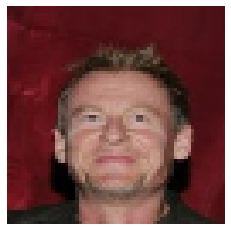

In [4]:
for x in test_dataset:
    plt.axis("off")
    plt.imshow(((x.numpy() * 127.5)+127.5).astype("int32")[0])
    break

## **WGAN class**

The code shows the definition of a GAN (Generative Adversarial Network) called WGAN (Wasserstein GAN). This class inherits from the tf.keras.Model class, which means that it is a TensorFlow model that can be trained, evaluated and used for making predictions.

In the init method of the class, two sequential models are defined, one for the generator and one for the discriminator. The generator model takes as input a random noise tensor with shape (batch_size, noise_dim) and returns a tensor with generated images with shape (batch_size, 64, 64, 3). The discriminator model takes as input an image tensor with shape (batch_size, 64, 64, 3) and returns a tensor with a single dimension of values between 0 and 1, representing the probability that each image is real or fake.

Then, the optimizers for training both models are defined. In this case, both use the RMSprop optimizer with a learning rate of 5e-5. A loss function is also defined using the loss_fn function that fulfills the definition of the Wasserstein loss function.

Next, the WGAN class has a method called generate_and_save_images that takes two arguments: epoch and noise. This method is used to generate images using the noise and the model's generator. The generated prediction values are in a range of [-1, 1], so they must be normalized to a range of [0, 1] in order to be properly visualized. Then, the figure function of matplotlib is used to create a figure and a for loop is used to show each of the generated predictions in a subplot.

The WGAN class has a method called "train" which is used to train the model. This method takes two arguments: dataset and epochs. First, it iterates over each epoch and uses a for loop to iterate over the dataset. Then, it calls the "train_step_discriminator" method and passes the real image from the dataset. Next, it calls the "train_step_generator" method to train the generator. At the end of each epoch, it calls the "generate_and_save_images" method to generate and display the images using the current progress of the network.

## **Clase WGAN**

El código muestra la definición de una red GAN (Generative Adversarial Network) llamada WGAN (Wasserstein GAN). Esta clase hereda de la clase tf.keras.Model, lo que significa que es un modelo de TensorFlow que puede ser entrenado, evaluado y usado para hacer predicciones.

En el método init de la clase, se definen dos modelos secuenciales, uno para el generador y otro para el discriminador. El modelo del generador toma como entrada un tensor de ruido aleatorio con forma (batch_size, noise_dim) y devuelve un tensor con imágenes generadas con forma (batch_size, 64, 64, 3). El modelo del discriminador toma como entrada un tensor de imágenes con forma (batch_size, 64, 64, 3) y devuelve un tensor con una sola dimensión de valores entre 0 y 1, que representa la probabilidad de que cada imagen sea real o falsa.

Luego, se definen los optimizadores para entrenar ambos modelos. En este caso, ambos utilizan el optimizador RMSprop con una tasa de aprendizaje de 5e-5. También se define una función de pérdida usando la funcion loss_fn que cumple con la definicion de la funcion de perdida de Wasserstein.

Para continuar, la clase WGAN tiene un método llamado generate_and_save_images que recibe dos argumentos: epoch y noise. Este método se utiliza para generar imágenes utilizando el ruido noise y el generador del modelo. Los valores de predicción generados están en un rango de [-1, 1], por lo que se deben normalizar a un rango de [0, 1] para poder visualizarlos adecuadamente. Luego, se utiliza la función figure de matplotlib para crear una figura y se utiliza un bucle for para mostrar cada una de las predicciones generadas en un subplot.

Luego, la clase WGAN tiene un método llamado train que se utiliza para entrenar el modelo. Este método recibe dos argumentos: dataset y epochs. Primero, se itera sobre cada epoch y se utiliza un bucle for para iterar sobre el conjunto de datos. Luego, se llama al método train_step_discriminator y se le pasa la imagen real del conjunto de datos. Luego, se llama al método train_step_generator para entrenar el generador. Al final de cada epoch, se llama al método generate_and_save_images para generar y mostrar las imagenes usando el progreso actual de la red.





In [11]:
class WGAN(tf.keras.Model):

  def __init__(self, noise_dim, batch_size):

    super(WGAN, self).__init__()

    self.noise_dim = noise_dim
    self.batch_size = batch_size

    self.generator = models.Sequential([
        layers.Input(shape=(noise_dim,)),

        layers.Dense(8 * 8 * 128),
        layers.Reshape((8, 8, 128)),

        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same", 
                               kernel_initializer=initializers.RandomNormal(stddev=0.02)),
        layers.LeakyReLU(alpha=0.2),

        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same", 
                               kernel_initializer=initializers.RandomNormal(stddev=0.02)),
        layers.LeakyReLU(alpha=0.2),

        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same", 
                               kernel_initializer=initializers.RandomNormal(stddev=0.02)),
        layers.LeakyReLU(alpha=0.2),

        layers.Conv2D(3, kernel_size=5, activation='tanh', padding="same", 
                      kernel_initializer=initializers.RandomNormal(stddev=0.02)),
    ])

    self.discriminator = models.Sequential([
        
        layers.Input(shape=(64, 64, 3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same", 
                      kernel_initializer=initializers.RandomNormal(stddev=0.02),
                      kernel_constraint=constraints.MinMaxNorm(min_value=-0.01, max_value=0.01)),
        layers.LeakyReLU(alpha=0.2),

        layers.Conv2D(128, kernel_size=4, strides=2, padding="same", 
                      kernel_initializer=initializers.RandomNormal(stddev=0.02),
                      kernel_constraint=constraints.MinMaxNorm(min_value=-0.01, max_value=0.01)),
        layers.LeakyReLU(alpha=0.2),

        layers.Conv2D(128, kernel_size=4, strides=2, padding="same", 
                      kernel_initializer=initializers.RandomNormal(stddev=0.02),
                      kernel_constraint=constraints.MinMaxNorm(min_value=-0.01, max_value=0.01)),
        layers.LeakyReLU(alpha=0.2),

        layers.Flatten(),

        layers.Dropout(0.2),

        layers.Dense(1, activation='linear'),
    ])

    self.d_optimizer = tf.keras.optimizers.RMSprop(learning_rate=5e-5)
    self.g_optimizer = tf.keras.optimizers.RMSprop(learning_rate=5e-5)

    self.d_loss_metric = tf.keras.metrics.Mean(name='d_loss')
    self.g_loss_metric = tf.keras.metrics.Mean(name='g_loss')

    self.d_loss_val = tf.keras.metrics.Mean(name='d_val')
    self.g_loss_val = tf.keras.metrics.Mean(name='g_val')

    self.train_summary_writer = tf.summary.create_file_writer('logs/train')
    self.val_summary_writer = tf.summary.create_file_writer('logs/val')


  def generate_and_save_images(self, epoch, noise):
    predictions = (self.generator(noise)+1)/2
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i + 1)
      plt.imshow(predictions[i, :, :, :])
      plt.axis('off')

    # tight_layout minimizes the overlap between 2 sub-plots
    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

    return predictions

  @tf.function
  def loss_fn(self, y_true, y_pred):
    return tf.math.reduce_mean(y_true * y_pred)

  @tf.function
  def train_step_discriminator(self, real_images):
    noise = tf.random.normal(shape=(self.batch_size, self.noise_dim))
    fake_images = self.generator(noise)

    with tf.GradientTape() as tape:
      logits_real = self.discriminator(real_images)
      logits_fake = self.discriminator(fake_images)

      d_loss_real = self.loss_fn(tf.ones_like(logits_real), logits_real)
      d_loss_fake = self.loss_fn(-tf.ones_like(logits_fake), logits_fake)
      d_loss = d_loss_real + d_loss_fake

    grads = tape.gradient(d_loss, self.discriminator.trainable_variables)
    self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_variables))

    self.d_loss_metric.update_state(d_loss)

  @tf.function
  def train_step_generator(self):
    noise = tf.random.normal(shape=(self.batch_size, self.noise_dim))

    with tf.GradientTape() as tape:
      fake_images = self.generator(noise)
      logits_fake = self.discriminator(fake_images)
      g_loss = self.loss_fn(tf.ones_like(logits_fake), logits_fake)

    grads = tape.gradient(g_loss, self.generator.trainable_variables)
    self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_variables))

    self.g_loss_metric.update_state(g_loss)

  @tf.function
  def val_step_discriminator(self, real_images):
    noise = tf.random.normal(shape=(self.batch_size, self.noise_dim))

    # Generate fake images
    fake_images = self.generator(noise)

    logits_real = self.discriminator(real_images)
    logits_fake = self.discriminator(fake_images)

    d_loss_real = self.loss_fn(tf.ones_like(logits_real), logits_real)
    d_loss_fake = self.loss_fn(-tf.ones_like(logits_fake), logits_fake)

    d_loss = d_loss_real + d_loss_fake

    self.d_loss_val.update_state(d_loss)

  @tf.function
  def val_step_generator(self):
    noise = tf.random.normal(shape=(self.batch_size, self.noise_dim))

    fake_images = self.generator(noise)

    logits_fake = self.discriminator(fake_images)

    g_loss = self.loss_fn(tf.ones_like(logits_fake), logits_fake)

    self.g_loss_val.update_state(g_loss)


  
  def train(self, train_dataset, epochs, val_dataset=None):

    with self.train_summary_writer.as_default():
      for epoch in range(7, epochs+1):
        print("Training Progress")
        f = IntProgress(min=0, max=len(train_dataset)) # create the bar
        display(f) # display the bar

        for real_images in train_dataset:
          self.train_step_discriminator(real_images)
          self.train_step_generator()
          f.value += 1

        
        if val_dataset:
          print("Validation Progress")
          f = IntProgress(min=0, max=len(val_dataset)) # create the bar
          display(f) # display the bar
          for val_images in val_dataset:
            self.val_step_discriminator(val_images)
            self.val_step_generator()
            f.value += 1

        noise = tf.random.normal(shape=[16, self.noise_dim])
        self.generate_and_save_images(epoch, noise)

        tf.summary.scalar('d_loss', self.d_loss_metric.result(), step=epoch)
        tf.summary.scalar('g_loss', self.g_loss_metric.result(), step=epoch)

        self.generator.save(f"epoch{str(epoch)}g.h5")
        self.discriminator.save(f"epoch{str(epoch)}d.h5")

        self.d_loss_metric.reset_states()
        self.g_loss_metric.reset_states()

        if val_dataset:

          tf.summary.scalar('d_val', self.d_loss_val.result(), step=epoch)
          tf.summary.scalar('g_val', self.g_loss_val.result(), step=epoch)

          self.d_loss_val.reset_states()
          self.g_loss_val.reset_states()

        




The code initializes an instance of the WGAN (Wasserstein Generative Adversarial Network) class with noise_dim and batch_size as input arguments. The value of noise_dim specifies the size of the noise tensor that is used as input to the generator model. The value of batch_size specifies the number of images that are processed in each training step.

El código inicializa una instancia de la clase WGAN (Red Generativa Adversarial de Wasserstein) con noise_dim y batch_size como argumentos de entrada. El valor de noise_dim especifica el tamaño del tensor de ruido que se utiliza como entrada para el modelo generador. El valor de batch_size especifica el número de imágenes que se procesan en cada paso de entrenamiento.

In [12]:
noise_dim = 128

gan = WGAN(noise_dim, batch_size)

In [13]:
gan.generator = models.load_model("epoch6g.h5")
gan.discriminator = models.load_model("epoch6d.h5")

In [14]:
gan.generator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8192)              1056768   
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 16, 16, 128)      262272    
 ranspose)                                                       
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 32, 32, 256)      524544    
 ranspose)                                                       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 32, 32, 256)      

In [15]:
gan.discriminator.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       131200    
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)         262272    
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 8192)             

The code trains the WGAN model on the training dataset for a specified number of epochs. The model is evaluated on the test dataset after each epoch.

El código entrena el modelo WGAN en el conjunto de datos de entrenamiento durante un número especificado de epochs. El modelo se evalúa en el conjunto de datos de prueba después de cada epoch.

Training Progress


IntProgress(value=0, max=5065)

Validation Progress


IntProgress(value=0, max=1267)

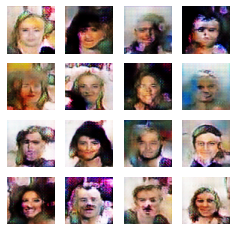

Training Progress


IntProgress(value=0, max=5065)

Validation Progress


IntProgress(value=0, max=1267)

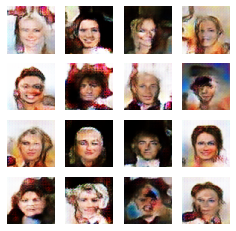

Training Progress


IntProgress(value=0, max=5065)

Validation Progress


IntProgress(value=0, max=1267)

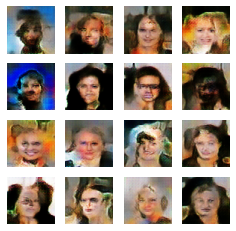

Training Progress


IntProgress(value=0, max=5065)

Validation Progress


IntProgress(value=0, max=1267)

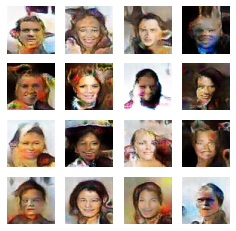

Training Progress


IntProgress(value=0, max=5065)

Validation Progress


IntProgress(value=0, max=1267)

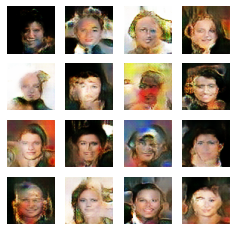

Training Progress


IntProgress(value=0, max=5065)

Validation Progress


IntProgress(value=0, max=1267)

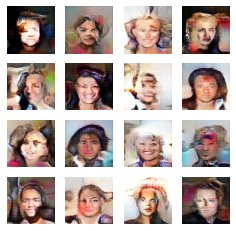

Training Progress


IntProgress(value=0, max=5065)

Validation Progress


IntProgress(value=0, max=1267)

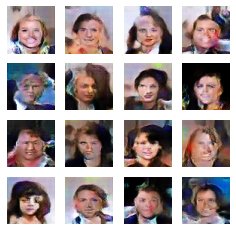

Training Progress


IntProgress(value=0, max=5065)

Validation Progress


IntProgress(value=0, max=1267)

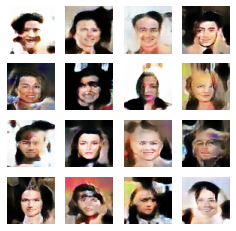

Training Progress


IntProgress(value=0, max=5065)

Validation Progress


IntProgress(value=0, max=1267)

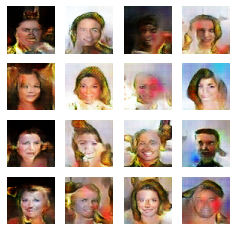

Training Progress


IntProgress(value=0, max=5065)

Validation Progress


IntProgress(value=0, max=1267)

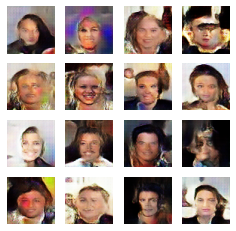

Training Progress


IntProgress(value=0, max=5065)

In [ ]:
epochs = 20

gan.train(train_dataset, epochs, test_dataset)

In [16]:
!zip -r /content/logs.zip /content/logs

  adding: content/logs/ (stored 0%)
  adding: content/logs/train/ (stored 0%)
  adding: content/logs/train/events.out.tfevents.1673323916.850a71a5c116.315.0.v2 (deflated 61%)
  adding: content/logs/val/ (stored 0%)
  adding: content/logs/val/events.out.tfevents.1673323916.850a71a5c116.315.1.v2 (deflated 10%)
